# CGNN Example on the Flow Cytometry dataset dataset 
Sachs, K., Perez, O., Pe’er, D., Lauffenburger, D. A., & Nolan, G. P. (2005). Causal protein-signaling networks derived from multiparameter single-cell data. Science, 308(5721), 523-529

In [1]:
#Import libraries
import cdt
from cdt import SETTINGS
SETTINGS.verbose=False
SETTINGS.NB_JOBS=4
import networkx as nx
import time
# A warning on R libraries might occur. It is for the use of the r libraries that could be imported into the framework
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Detecting CUDA devices : (1, 2)


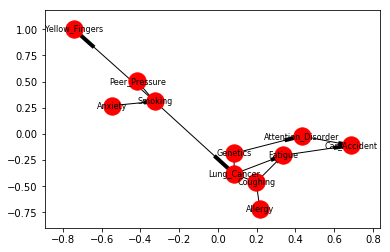

,Allergy,Anxiety,Genetics,Peer_Pressure,Attention_Disorder,Smoking,Lung_Cancer,Yellow_Fingers,Coughing,Fatigue,Car_Accident
0,-0.266076,0.460788,-0.359440,-0.403187,-0.228317,1.334455,0.574623,1.163336,0.982726,-0.840672,-0.508322
1,-0.579084,-0.846836,-0.295204,0.302683,-0.256269,-1.637193,-1.395067,0.154516,0.341314,0.933638,-1.075662
2,-0.105876,0.603170,-0.246007,-0.066926,-0.100983,0.500359,0.329122,0.199425,0.314847,-0.143226,-0.755328
3,0.727293,-0.949493,0.749637,-0.595794,0.809405,-0.586919,-0.130269,-0.840610,-0.691177,0.303761,-0.431910
4,-0.175018,-0.820478,-0.432949,-0.729511,-0.753609,-0.219810,-0.700120,-0.733240,-0.149308,0.854195,-0.633940


In [2]:
# Load data and graph solution
data, solution = cdt.data.load_dataset('sachs')
nx.draw_networkx(solution, font_size=8) # The plot function allows for quick visualization of the graph. 
plt.show()
data.head()

--- Execution time : 165. seconds ---


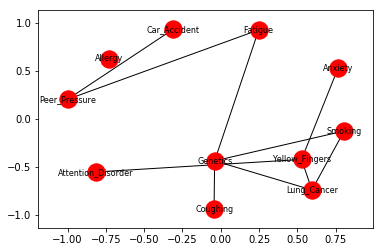

,0,1,2
0,Attention_Disorder,Yellow_Fingers,0.003286
1,Peer_Pressure,Fatigue,0.000762
2,Peer_Pressure,Car_Accident,0.001092
3,Genetics,Lung_Cancer,0.005086
4,Genetics,Fatigue,0.002864
5,Genetics,Smoking,0.003486
6,Genetics,Coughing,0.013518
7,Lung_Cancer,Yellow_Fingers,0.007210
8,Lung_Cancer,Smoking,0.010610
9,Yellow_Fingers,Anxiety,0.002345


In [3]:
# Finding the structure of the graph
from cdt.independence.graph import FSGNN

Fsgnn = FSGNN(train_epochs=2000, test_epochs=1000, l1=0.01)

start_time = time.time()
ugraph = Fsgnn.predict(data, threshold=5e-4)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))
nx.draw_networkx(ugraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# List results
pd.DataFrame(list(ugraph.edges(data='weight')))

The pairwise GNN model is computed on each edge of the UMG to initialize the model and start CGNN with a DAG


--- Execution time : 1870 seconds ---


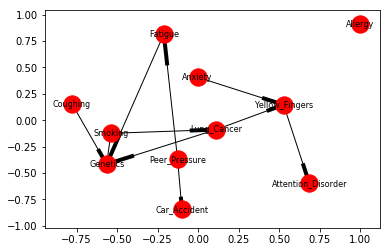

,Cause,Effect,Score
0,Anxiety,Yellow_Fingers,0.107771
1,Smoking,Lung_Cancer,0.018201
2,Smoking,Genetics,0.102932
3,Lung_Cancer,Genetics,0.075994
4,Lung_Cancer,Yellow_Fingers,0.158232
5,Yellow_Fingers,Attention_Disorder,0.040927
6,Fatigue,Genetics,0.014421
7,Peer_Pressure,Fatigue,0.033732
8,Peer_Pressure,Car_Accident,0.174860
9,Coughing,Genetics,0.062621


In [4]:
# Orient the edges of the graph
from cdt.causality.graph import CGNN
Cgnn = CGNN(nruns=16, train_epochs=1500, test_epochs=1000)
start_time = time.time()
dgraph = Cgnn.predict(data, graph=ugraph)
print("--- Execution time : %4.4s seconds ---" % (time.time() - start_time))

# Plot the output graph
nx.draw_networkx(dgraph, font_size=8) # The plot function allows for quick visualization of the graph.
plt.show()
# Print output results : 
pd.DataFrame(list(dgraph.edges(data='weight')), columns=['Cause', 'Effect', 'Score'])